# Perception and LDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.utils import shuffle 
%matplotlib inline

## Perception

### Data Generation

In [90]:
# Data Generation
np.random.seed(1314)
def data_generation(n,basepoint,ylabel):
    x1 = np.random.random((n,))+np.array([basepoint[0]]*n)
    x2 = np.random.random((n,))+np.array([basepoint[1]]*n)
    y = np.array([ylabel]*n)
    data = pd.DataFrame({"x1":x1,"x2":x2,"y":y})
    return data

# positive data
positivedata = data_generation(n=30,basepoint=(1,2),ylabel=1)
# negative data
negativedata = data_generation(n=20,basepoint=(2,1),ylabel=-1)
# train data
train_data = pd.concat([positivedata,negativedata])
train_data = shuffle(train_data)
train_data.index = range(train_data.shape[0])
train_data.head(5)

,x1,x2,y
0,1.749421,2.193847,1
1,2.057071,1.983485,-1
2,2.830457,1.026819,-1
3,1.437378,2.345612,1
4,2.730692,1.493602,-1


In [24]:
x1=train_data.iloc[1,0]
x2=train_data.iloc[1,1]
print(x1)

2.0570706604492566


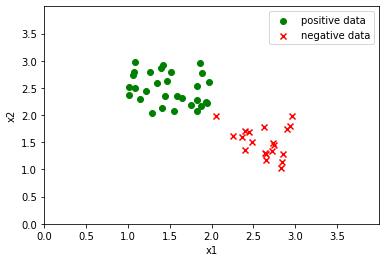

In [4]:
# train data scatter plot
plt.scatter(x=positivedata["x1"],y=positivedata["x2"],marker="o",c="green",label="positive data")
plt.scatter(x=negativedata["x1"],y=negativedata["x2"],marker="x",c="red",label="negative data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim((0,4))
plt.ylim((0,4))
plt.xticks(np.arange(0,4,0.5))
plt.yticks(np.arange(0,4,0.5))
plt.legend()

### Parameter Solving

In [81]:
def param_solving(train_data,lr,start_w):
    # initial parameter
    w = np.array(start_w) # w = [w1,w2,b]
    x = train_data[["x1","x2"]].values
    onecolumn = np.ones((train_data.shape[0],))
    X = np.column_stack((x,onecolumn))
    y = train_data["y"].values
    k = 0
    inter_data = {"k":[],"Parameter":[],"Loss Function":[],"Misclassifications":[],"Point Used for Update":[]}
    # stochastic gradient descent
    while np.any((np.dot(X,w)*y<0) | (np.dot(X,w)*y==0)):
        k += 1
        falseindex = np.where((np.dot(X,w)*y<0) | (np.dot(X,w)*y==0))

        # storing information about the iterative process
        if k%5 == 0:
            inter_data["k"].append(k)
            inter_data["Parameter"].append(w.round(4))
            falsedata = train_data.iloc[falseindex[0],:]
            x_falseclassified = falsedata[["x1","x2"]].values
            X_falseclassified = np.column_stack((x_falseclassified,np.ones((falsedata.shape[0],))))
            y_falseclassified = falsedata["y"].values
            loss = -sum(np.dot(X_falseclassified,w)*y_falseclassified)
            inter_data["Loss Function"].append(loss.round(4))
            inter_data["Misclassifications"].append(falseindex[0])
            inter_data["Point Used for Update"].append(falseindex[0][0])
        
        x_forupdate = train_data.iloc[falseindex[0][0],[0,1]].values
        y_forupdate = train_data.iloc[falseindex[0][0],[2]].values
        delta = np.append(lr*y_forupdate*x_forupdate,lr*y_forupdate)
        w = w + delta
    inter_information = pd.DataFrame(inter_data)

    result_data = {}
    result_data["final parameters"] = w.round(4)
    result_data["interative information"] = inter_information
    result_data["number of iterations"] = k
 
    return result_data
            
                

In [95]:
result = param_solving(train_data=train_data,lr=0.01,start_w=[1,1,1])

In [79]:
result["number of iterations"]

85

In [91]:
result["interative information"].head(5)

,k,Parameter,Loss Function,Misclassifications,Point Used for Update
0,5,"[-0.0062, 0.0042, 0.0]",0.0161,"[0, 5, 7, 9, 24, 28, 36, 43, 45, 49]",0
1,10,"[0.0052, 0.0304, 0.01]",1.3912,"[1, 2, 4, 10, 12, 13, 15, 18, 22, 29, 30, 32, ...",1
2,15,"[-0.0215, 0.0147, 0.0]",0.0564,"[0, 5, 7, 9, 24, 28, 36, 43, 45, 49]",0
3,20,"[-0.0102, 0.0409, 0.01]",0.9020,"[1, 2, 4, 10, 12, 13, 15, 18, 22, 29, 30, 32, ...",1
4,25,"[-0.0369, 0.0252, 0.0]",0.0967,"[0, 5, 7, 9, 24, 28, 36, 43, 45, 49]",0


In [94]:
result["interative information"].iloc[3,3]

array([ 1,  2,  4, 10, 12, 13, 15, 18, 22, 29, 30, 32, 33, 37, 38, 39, 40,
       42, 44, 46], dtype=int64)

In [97]:
result["final parameters"]

array([-0.2049, -0.0153,  0.45  ])

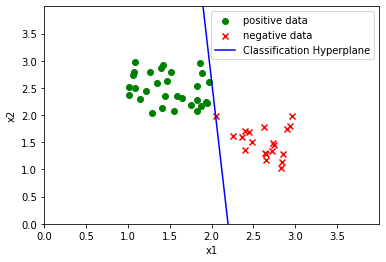

In [96]:
w = result["final parameters"]
x1_line = np.linspace(0,4,1000)
x2_line = (-w[0]*x1_line - w[2])/w[1]
plt.scatter(x=positivedata["x1"],y=positivedata["x2"],marker="o",c="green",label="positive data")
plt.scatter(x=negativedata["x1"],y=negativedata["x2"],marker="x",c="red",label="negative data")
plt.plot(x1_line,x2_line,c="blue",label="Classification Hyperplane")
plt.xlim((0,4))
plt.ylim((0,4))
plt.xticks(np.arange(0,4,0.5))
plt.yticks(np.arange(0,4,0.5))
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()